# **Real-Time Web Scraping and Sentiment Analysis of INR Exchange Rates**

This code retrieves exchange rates for the Indian Rupee (INR) against various currencies. It compares the current rates to previous ones to classify the sentiment as "Positive," "Negative," or "Neutral." Two plots are generated in real-time: one shows the exchange rates for different currencies against INR, and the other visualizes the sentiment summary of rate changes, providing insights into the market trends relative to INR.

In [ ]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

#Define the URL
url = "https://www.x-rates.com/table/?from=INR&amount=1"

#Fetch the data
dfs = pd.read_html(url)

#Use Table 0
df = dfs[0]

#Print the columns and the first few rows of Table 0
print("Columns available :", df.columns.tolist(),"\n")
print(df)



Columns available : ['Indian Rupee', '1.00 INR', 'inv. 1.00 INR'] 

            Indian Rupee  1.00 INR  inv. 1.00 INR
0              US Dollar  0.011906      83.988951
1                   Euro  0.010726      93.231683
2          British Pound  0.009039     110.630084
3      Australian Dollar  0.017686      56.541809
4        Canadian Dollar  0.016095      62.132025
5       Singapore Dollar  0.015485      64.576953
6            Swiss Franc  0.010068      99.320898
7      Malaysian Ringgit  0.051632      19.367840
8           Japanese Yen  1.708371       0.585353
9  Chinese Yuan Renminbi  0.084440      11.842692


In [ ]:
!pip install schedule

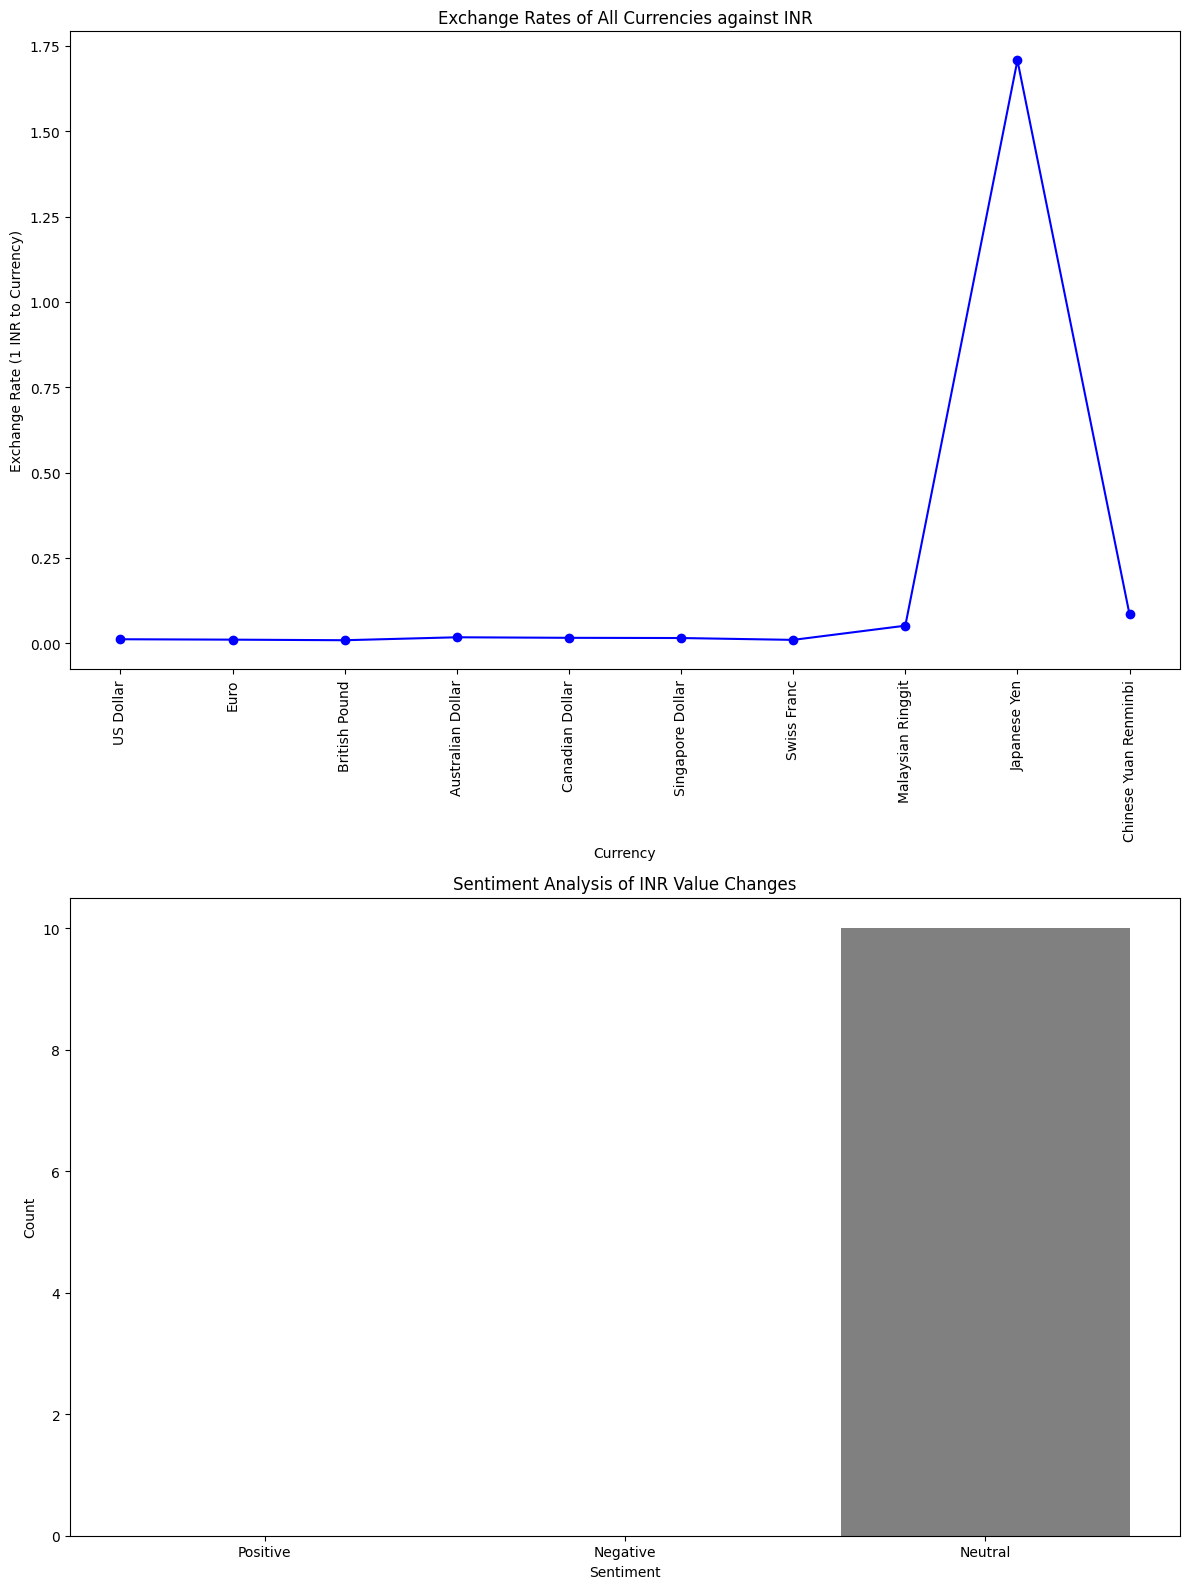

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import schedule
import time

#Define the URL
url = "https://www.x-rates.com/table/?from=INR&amount=1"

#Set up the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
plt.ion()  # Turn on interactive mode

#Initialize previous rates
previous_rates = {}

def classify_sentiment(current_rates):
    """ Classify sentiment based on INR value changes """
    sentiment = []
    for currency, rate in current_rates.items():
        if currency in previous_rates:
            previous_rate = previous_rates[currency]
            if rate > previous_rate:
                sentiment.append('Positive')
            elif rate < previous_rate:
                sentiment.append('Negative')
            else:
                sentiment.append('Neutral')
        else:
            sentiment.append('Neutral')
    return sentiment

def update_plot():
    global previous_rates

    #Fetch the data
    dfs = pd.read_html(url)
    df = dfs[0]

    #Add the date column
    single_date = date.today()  # Use current date, or specify a fixed date
    df['Date'] = single_date.strftime("%Y-%m-%d")

    #Rename the column for clarity
    df = df.rename(columns={'1.00 INR': 'Rate'})

    #Ensure 'Rate' column is a string before converting
    df['Rate'] = df['Rate'].astype(str).str.replace(',', '')

    #Convert 'Rate' to numeric
    df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

    #Convert data to dictionary for easy comparison
    current_rates = dict(zip(df['Indian Rupee'], df['Rate']))

    #Classify sentiment based on rate changes
    sentiments = classify_sentiment(current_rates)
    sentiment_counts = pd.Series(sentiments).value_counts()

    #Clear the previous plots
    ax1.clear()
    ax2.clear()

    #Plot the data with trend lines
    ax1.plot(df['Indian Rupee'], df['Rate'], marker='o', linestyle='-', color='blue')
    ax1.set_xlabel('Currency')
    ax1.set_ylabel('Exchange Rate (1 INR to Currency)')
    ax1.set_title('Exchange Rates of All Currencies against INR')
    ax1.tick_params(axis='x', rotation=90)

    #Plot the sentiment summary
    sentiment_summary = {
        'Positive': sentiment_counts.get('Positive', 0),
        'Negative': sentiment_counts.get('Negative', 0),
        'Neutral': sentiment_counts.get('Neutral', 0)
    }
    ax2.bar(sentiment_summary.keys(), sentiment_summary.values(), color=['green', 'red', 'gray'])
    ax2.set_xlabel('Sentiment')
    ax2.set_ylabel('Count')
    ax2.set_title('Sentiment Analysis of INR Value Changes')

    #Draw the updated plots
    plt.tight_layout()
    plt.draw()

    #Update the previous rates for future comparisons
    previous_rates = current_rates.copy()

    #Add a small pause to let the GUI update
    plt.pause(0.1)

#Schedule the update_plot function to run every 15 minutes
schedule.every(15).minutes.do(update_plot)

#Initial plot
update_plot()

# Continuously run the scheduler
try:
    while True:
        schedule.run_pending()
        plt.pause(1)  # Keep the GUI responsive and check for updates
except KeyboardInterrupt:
    plt.ioff()  # Turn off interactive mode
    plt.show()  # Show the final plot
